# Smarket Analysis

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/yashre-bh/ISL-Python-datasets/main/Smarket.csv')
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


## Summary of the dataset

In [104]:
data.shape

(1250, 9)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [106]:
data.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [107]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


## Correlation matrix

In [108]:
data.iloc[:, 0:-2].corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000


#### There is a significant correlation between Year and Volume

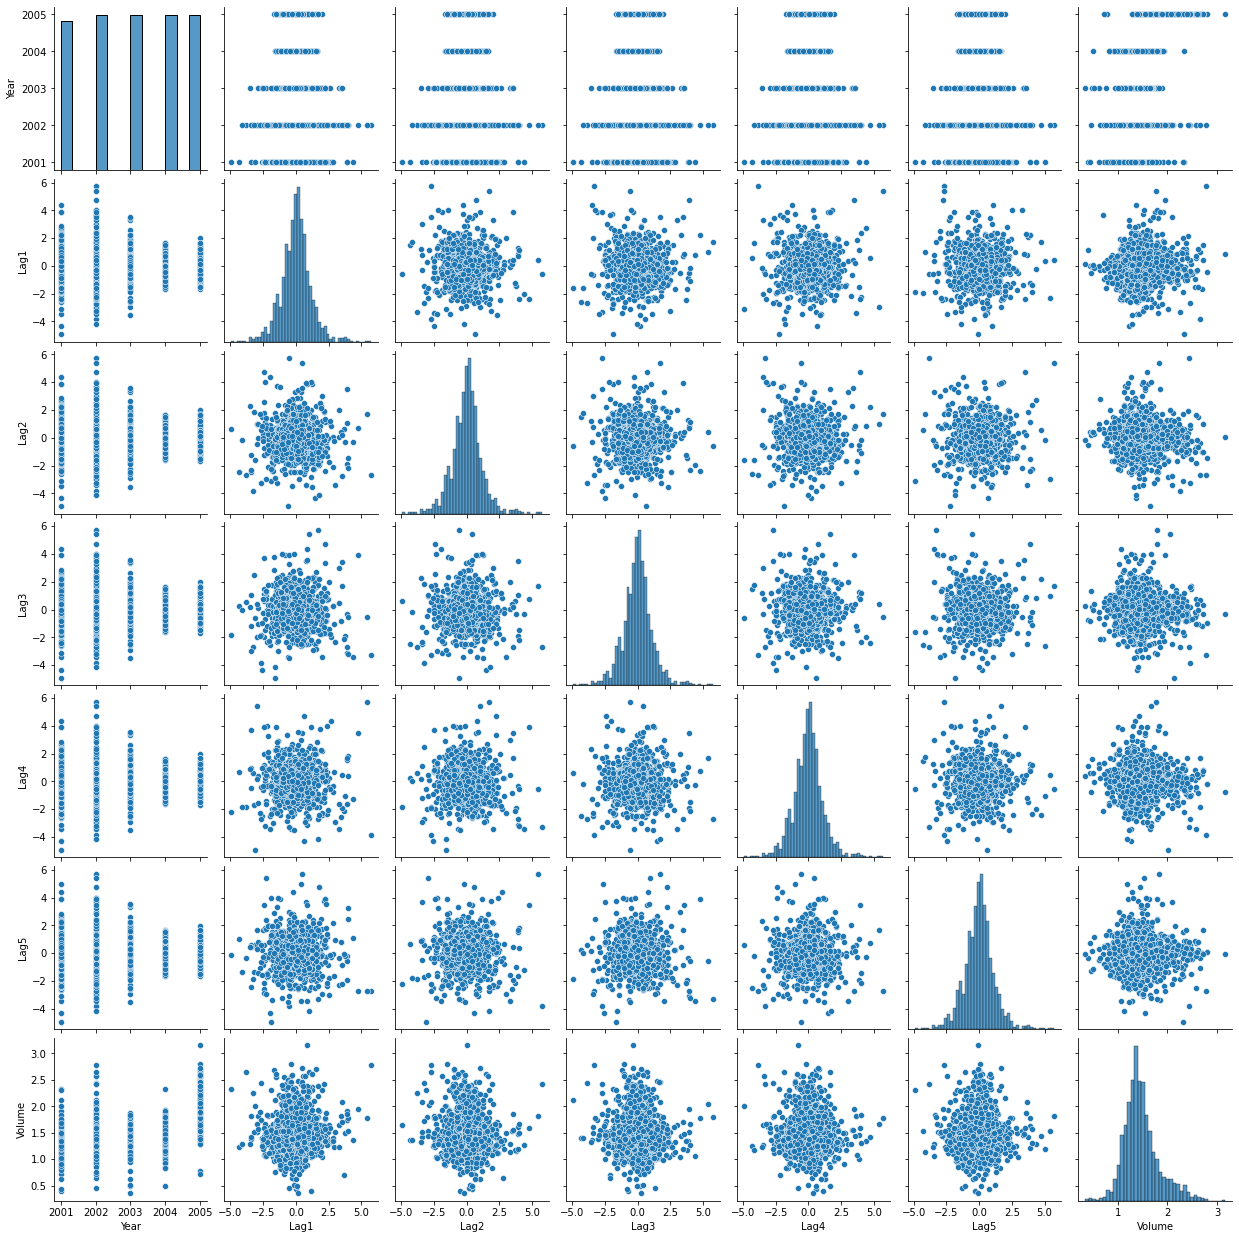

In [109]:
sns.pairplot(data.iloc[:, 0:-2])

# Logistic Regression

#### The direction has to be predicted using Lag1 through Lag5 and Volume:

In [110]:
data.Direction[data.Direction == "Up"] = 1
data.Direction[data.Direction == "Down"] = 0
data.head()


<ipython-input-110-731028174b47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Direction[data.Direction == "Up"] = 1
<ipython-input-110-731028174b47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Direction[data.Direction == "Down"] = 0


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [111]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [120]:
datanew1 = data[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Direction']]
datanew1['Direction']=datanew1['Direction'].astype(float)
datanew1.head()


<ipython-input-120-b993d4555d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew1['Direction']=datanew1['Direction'].astype(float)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,1.0
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.0
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,0.0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,1.0
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,1.0


In [121]:
from sklearn.model_selection import train_test_split

In [134]:
X = datanew1[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y = datanew1['Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [135]:
log_reg1 = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.689094
         Iterations 4


In [136]:
log_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                0.003257
Time:                        15:52:58   Log-Likelihood:                -689.09
converged:                       True   LL-Null:                       -691.35
Covariance Type:            nonrobust   LLR p-value:                    0.4793
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0926      0.057     -1.611      0.107      -0.205       0.020
Lag2          -0.0565      0.057     -0.987      0.324      -0.169       0.056
Lag3           0.0369      0.057      0.649      0.516      -0.074       0.148
Lag4           0.0208      0.056      0.373      0.709      -0.088       0.130
Lag5           0.0054      0.056      0.097      0.923      -0.104       0.114
Volume         0.0835      0.042      2.003      0.045       0.002       0.165
==============================================================================
"""

In [137]:
y_predicted = log_reg.predict(X_test)

In [138]:
print('Acutal values', y_test)
print('Predictions :', y_predicted)

Acutal values 680     1.0
1102    1.0
394     1.0
930     0.0
497     0.0
       ... 
382     1.0
678     0.0
1002    0.0
361     1.0
490     0.0
Name: Direction, Length: 250, dtype: float64
Predictions : 680     1.0
1102    1.0
394     1.0
930     1.0
497     1.0
       ... 
382     1.0
678     1.0
1002    1.0
361     1.0
490     1.0
Length: 250, dtype: float64


In [139]:
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, accuracy_score)
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[36 96]
 [25 93]]
Test accuracy =  0.516


# Linear Discriminant Analysis

# KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print("Accuracy Score: ", knn.score(X_test, y_test))

[1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
Accuracy Score:  0.536


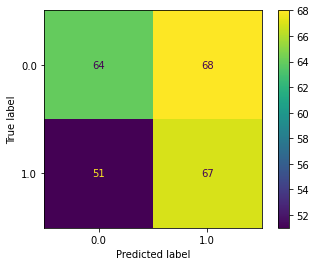

In [144]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()  
